## 1. Importing the required libraries and reading the data

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
df = pd.read_csv('Laptop_price.csv')

## 2. Initial Data Exploration

In [28]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [30]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


**Observations:**
- Dataset has 823 rows and 19 columns.
- All values are non-null.
- Data type of most of the columns is object.
- Price, number of ratings adn number or reviews are in integers.
- There are outliers in all 3 numerical columns.

## 3. Removing Outliers
Outliers are data points that differ significantly from other observations in a dataset. They can be much higher or lower than most of the dat and may indicate:
- Variability in the data.
- Errors in measurement or data entry.
- Something truly unusual or interesting.

A **z-score** tells us how many standard deviations a data point is from the mean of the dataset. 

z = (x−μ)/σ

Where x -> data-point, μ -> mean of the data, σ -> standard deviation

If z = 0: The value is exactly the mean.
If z = 1: 1 standard deviation above the mean.
If z = -2: 2 standard deviations below the mean.
Typically, data points with z > 3 or z < -3 are considered outliers.
​


In [32]:
# select numerical columns
numerical_columns = ['Price', 'Number of Ratings', 'Number of Reviews']

# remove outliers
laptops = df[(np.abs(stats.zscore(df[numerical_columns])) < 3).all(axis=1)]

In [33]:
print(f"After removing outliers, our dataset has {laptops.shape[0]} rows.")

After removing outliers, our dataset has 785 rows.


## 4. Exploratory Data Analysis (EDA)

### 4.1 Distributions and correlation across all numerical columns.

<Figure size 640x480 with 0 Axes>

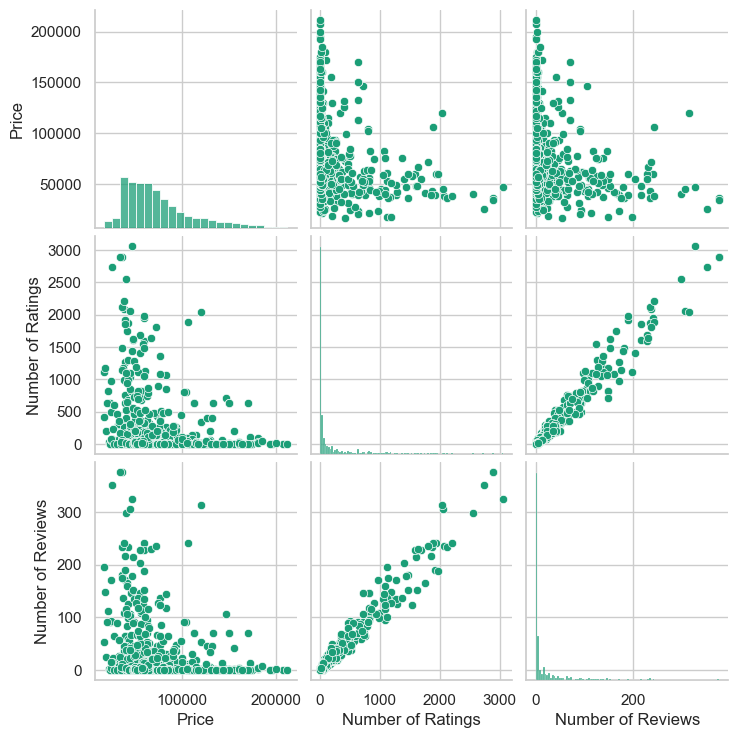

In [34]:
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Dark2')
sns.despine()

sns.pairplot(laptops)

Visually, the highest correlation is between Number of Ratings and Number of Reviews.

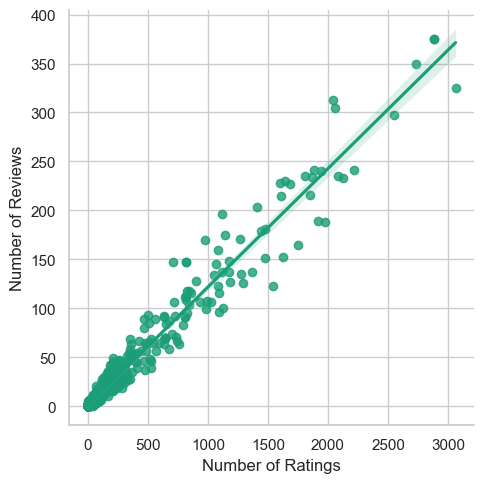

In [35]:
# Regression line for correlated columns
sns.lmplot(x='Number of Ratings',
           y='Number of Reviews',
           data=laptops)

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Number of Ratings'}>],
       [<Axes: title={'center': 'Number of Reviews'}>, <Axes: >]],
      dtype=object)

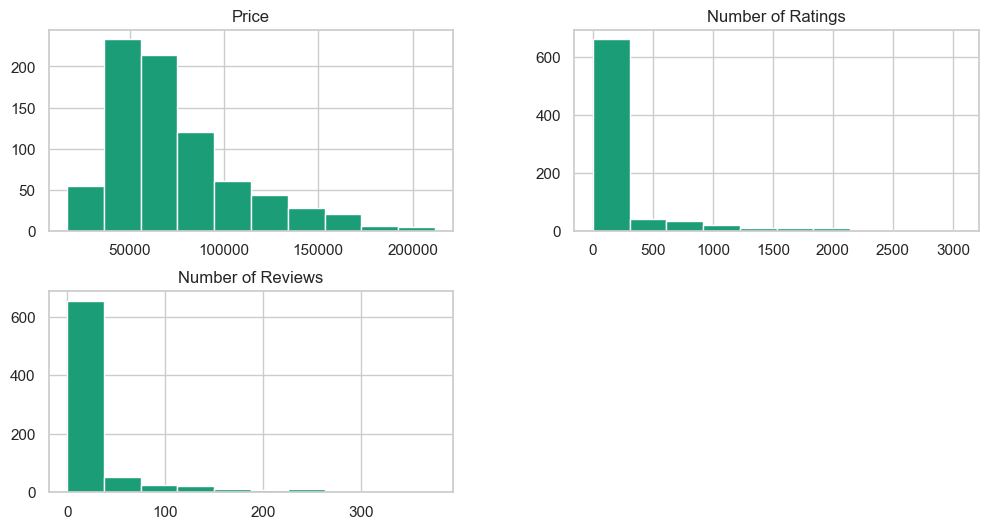

In [36]:
# Distribution of numerical columns
laptops[numerical_columns].hist(figsize=(12,6))

**Observation from the plots:**
- There is strong positive correlation between number of ratings and number of reviews.
- And there is some weak negative correlation between price and numbers of ratings and reviews, where we can see that expensive laptops tend to get very few or zero reviews (and ratings).
- Distributions of all of our numeric variables are right-skewed.

### 4.2 Univariate and Bivariate Analysis
Univariate analysis is the analysis of a single variable. Here we under the distribution, central tendency and spread of that variable. Example: plot histogram of "Age".

Bivariate analysis is the analysis of two variables to understand the relationship between them. Here we find if there is any association, correlation or causation between the two variables. Example: plot "Age vs Salary" scatter plot.

Brands

Text(0.5, 1.0, 'Boxplot of Prices by Brands')

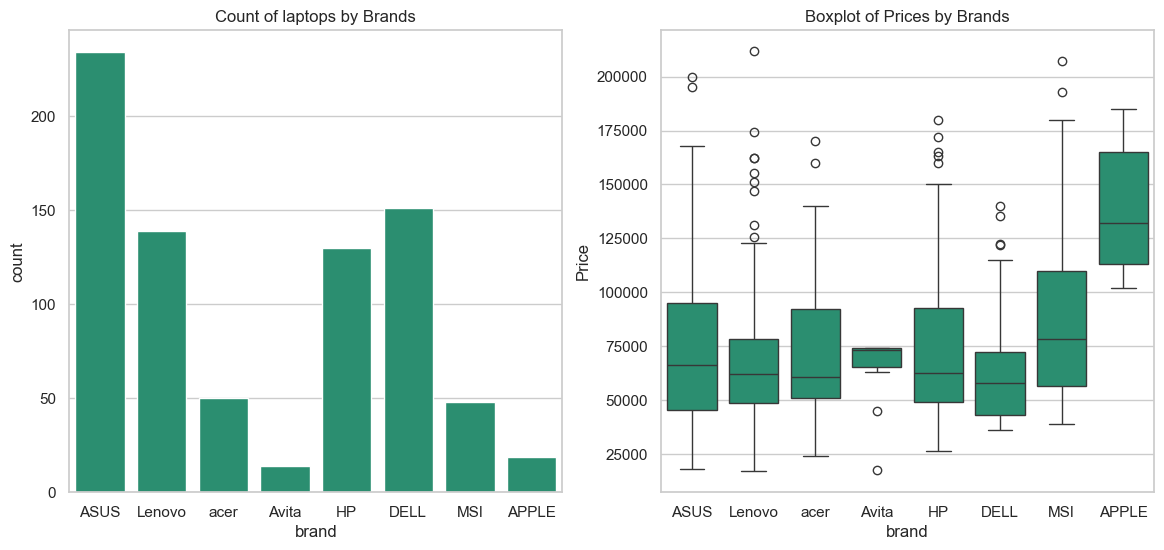

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.brand)
axes[0].set_title("Count of laptops by Brands")

sns.boxplot(ax=axes[1], x=laptops.brand, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Brands")

Processor Brands

Text(0.5, 1.0, 'Boxplot of Prices by Brands')

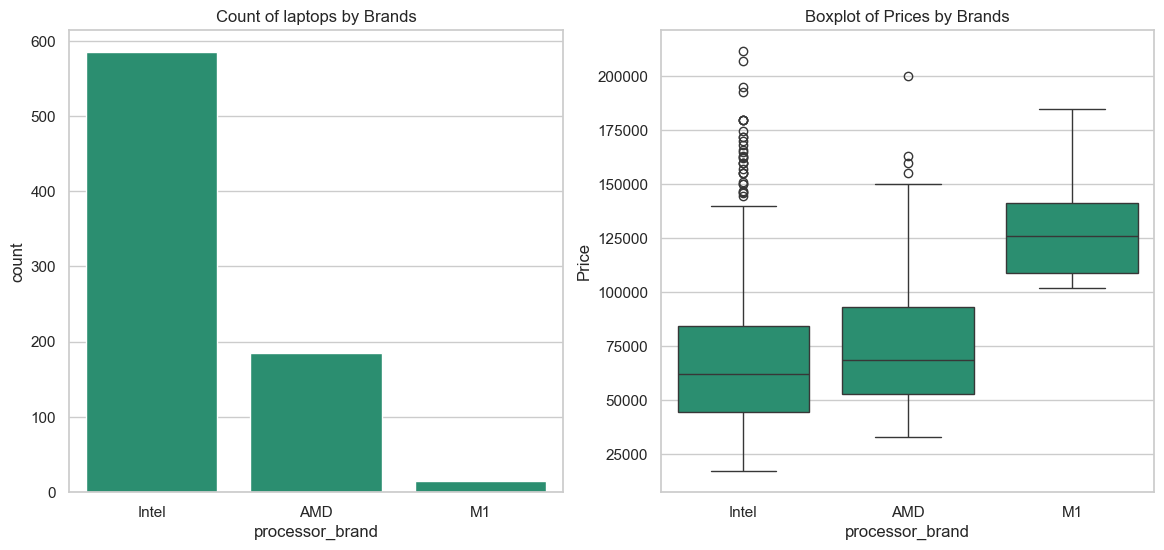

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.processor_brand)
axes[0].set_title("Count of laptops by Brands")

sns.boxplot(ax=axes[1], x=laptops.processor_brand, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Brands")

Processor Names

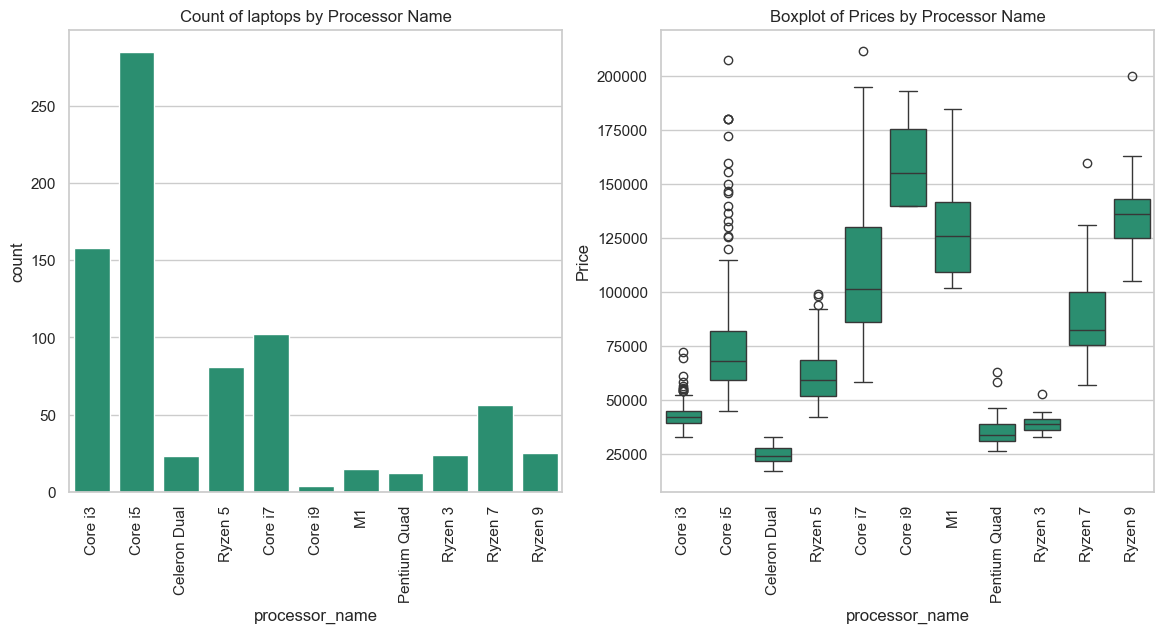

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.processor_name)
axes[0].set_title("Count of laptops by Processor Name")
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(ax=axes[1], x=laptops.processor_name, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Processor Name")
axes[1].tick_params(axis='x', rotation=90)

Processor Generations

Text(0.5, 1.0, 'Boxplot of Prices by Generation')

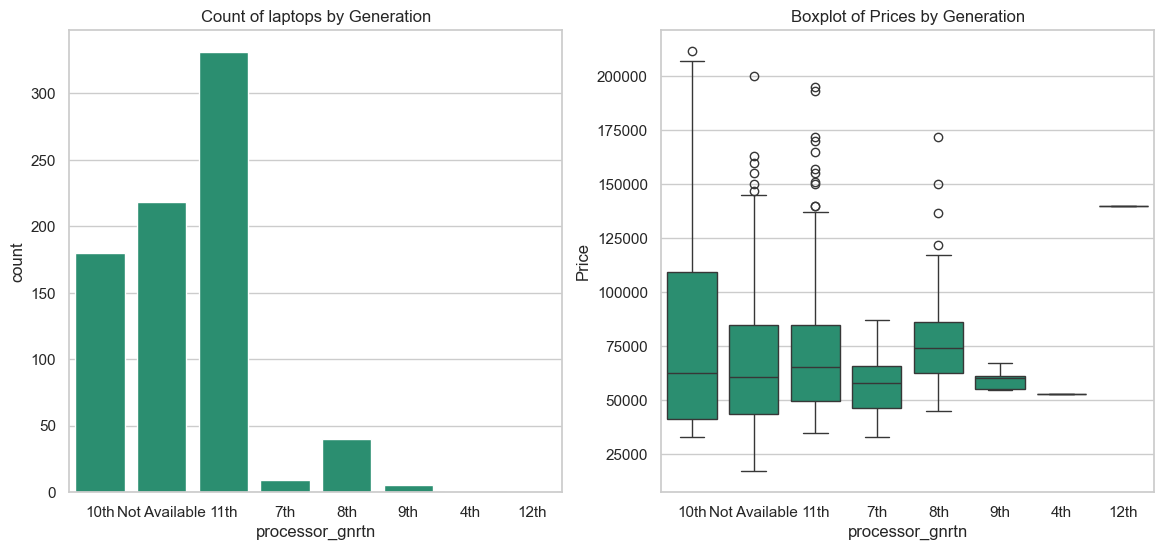

In [42]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.processor_gnrtn)
axes[0].set_title("Count of laptops by Generation")

sns.boxplot(ax=axes[1], x=laptops.processor_gnrtn, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Generation")

Ram GB

Text(0.5, 1.0, 'Boxplot of Prices by Ram Gb')

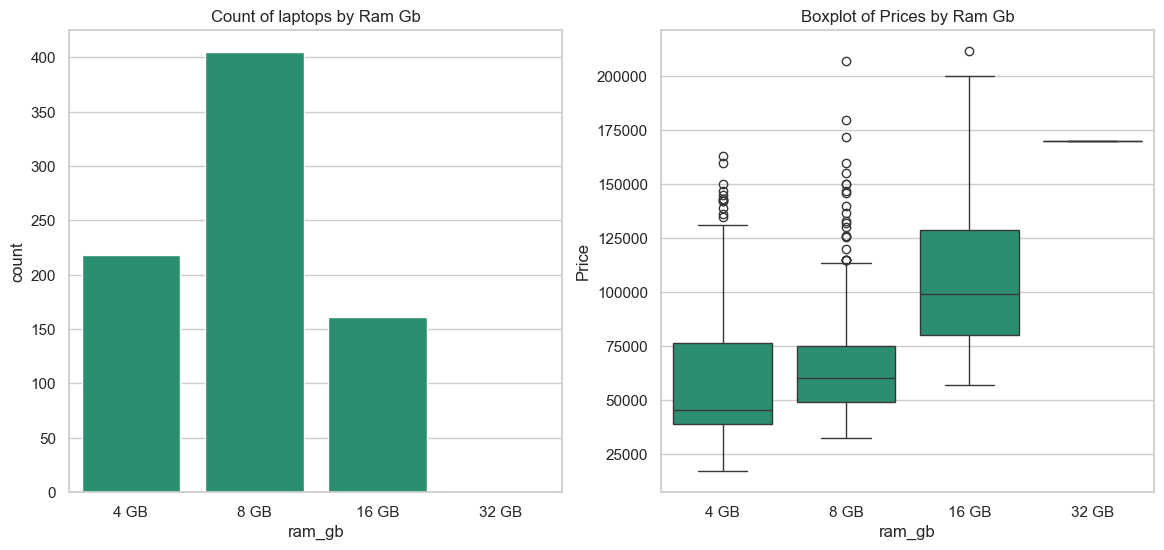

In [43]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.ram_gb)
axes[0].set_title("Count of laptops by Ram Gb")

sns.boxplot(ax=axes[1], x=laptops.ram_gb, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Ram Gb")

Solid State Drive (SSD)

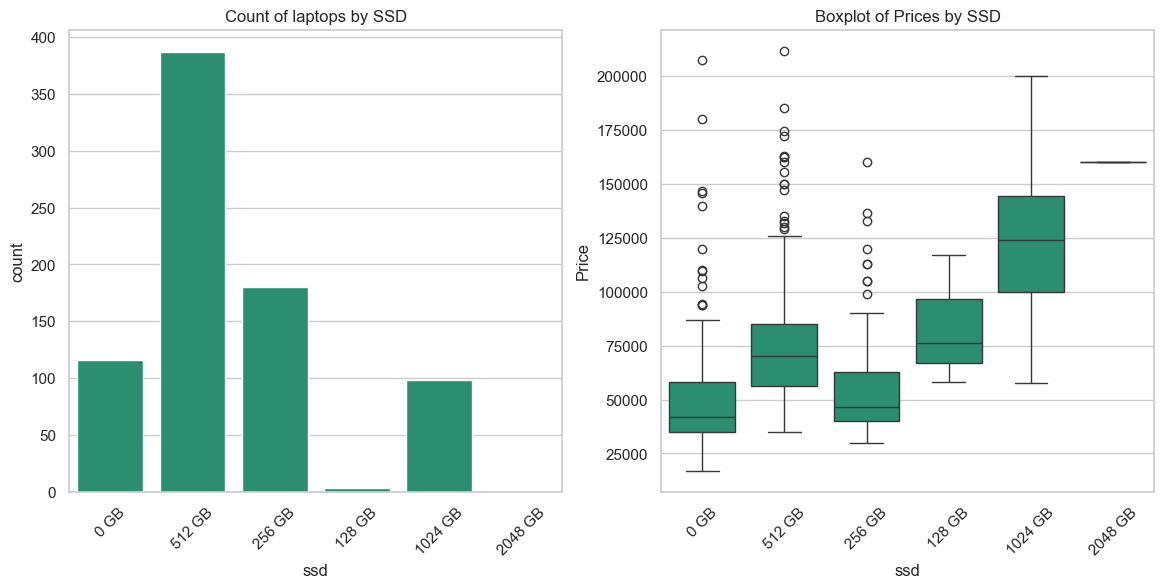

In [44]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.ssd)
axes[0].set_title("Count of laptops by SSD")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(ax=axes[1], x=laptops.ssd, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by SSD")
axes[1].tick_params(axis='x', rotation=45)

Operating Systems

Text(0.5, 1.0, 'Boxplot of Prices by OS')

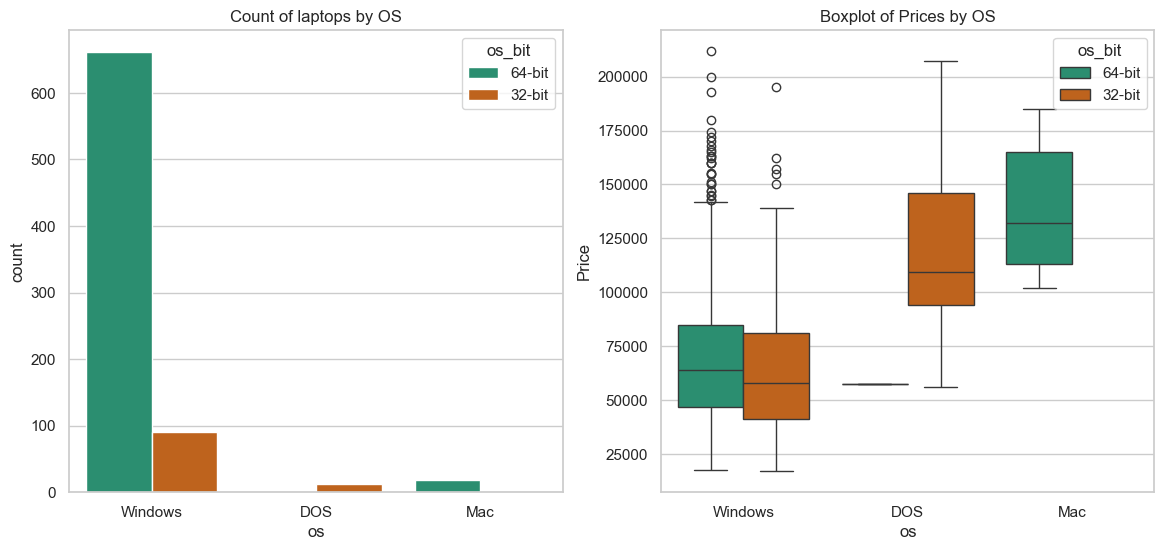

In [45]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.os, hue=laptops.os_bit)
axes[0].set_title("Count of laptops by OS")

sns.boxplot(ax=axes[1], x=laptops.os, y=laptops.Price, hue=laptops.os_bit)
axes[1].set_title("Boxplot of Prices by OS")

Touchscreen

Text(0.5, 1.0, 'Boxplot of Prices by Touchscreen')

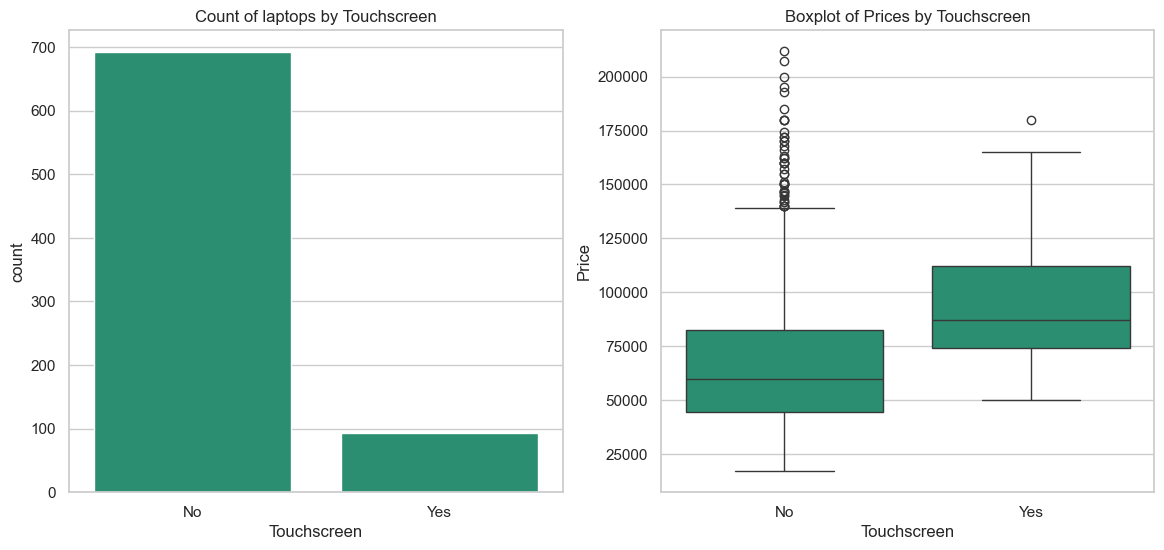

In [46]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=laptops.Touchscreen)
axes[0].set_title("Count of laptops by Touchscreen")

sns.boxplot(ax=axes[1], x=laptops.Touchscreen, y=laptops.Price)
axes[1].set_title("Boxplot of Prices by Touchscreen")

**Observations from the plots above:**
- ASUS is represented the most in our dataset, while APPLE seems to be the most expensive.
- Most of the laptops have processor Intel, while M1 si the most expensive on average.
- Core i9 is the latest and the fastest Intel processor and it is the most expensive, but most laptops represented in our dataset have Core i5 and Core i3.
- Processor Generation column has a lot of "Not Available" values. But from avaiable ones we can see that 10th and 11th are the most popular generations here in this dataset and they don't seem to be correlated with prices.
- 8 GB is the standard amount of RAM for an average laptop and we see it's the most popular one. Another observation is that more gigabytes of RAM correlate with higher prices. 32 GB RAM is the most expensive and the least used for now.
- Most laptops have 512 GB, which is enough for business use and simple gaming. Although, capacity of SSD seems to be correlated with prices, note there is a weird behaviour in laptops with 128 GB SSD (they seem to be more expensive than laptops with higher SSD). But such laptops are very rare in our dataset.
- Windows is difinetely the most popular operating system and on average it's the most affordable too.
- 7 out 8 laptops don't have touchscreen.

## 5. Data Preprocessing

### 5.1 Feature Encoding for Categorical Variables
One of the ways to convert categorical variables into dummy/indicator variables is to use pandas function `pd.get_dummies()`. It returns a DataFrame where each categorical variable is replaced by a set of binary columns indicating the presence or absence of the categorical value.

In [50]:
# Identify categorical variables by selecting columns with type 'object'
categorical_variables = laptops.columns[laptops.dtypes == 'object']

# Convert categorical variables into dummy variables, dropping the first level for each variables.
laptops = pd.get_dummies(laptops, columns=categorical_variables, drop_first=True)
laptops.head()

,Price,Number of Ratings,Number of Reviews,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer,...,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,Touchscreen_Yes,msoffice_Yes,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,34649,3,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,38999,65,5,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,39999,8,1,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
3,69990,0,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,26990,0,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


### 5.2 Train/Test Split

In [51]:
# Set X to all numerical features of the laptops
X = laptops.loc[:, laptops.columns != "Price"]

# Set y equal to "Price" column which we want to predict
y = laptops['Price']

**Split the data into training and testing sets:**
- Model Training: The training dataset is used to fit the machine learning model, allowing it to learn the patterns and relationships within the data.
- Model Evaluation: The testing dataset is used to evaluate the performance of the trained model on unseen data, providing an estimate of how well the model generalizes to new observations.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 6. Linear Regression Model

In [54]:
# Create an instance of Linear Regression
lm = LinearRegression()

# Fit linear regression model on the training data
lm.fit(X=X_train, y=y_train)

LinearRegression()

### 6.1 Predictions on Test Data

In [55]:
predictions = lm.predict(X_test)

Create a scatterplot of the real test values versus the predicted values.

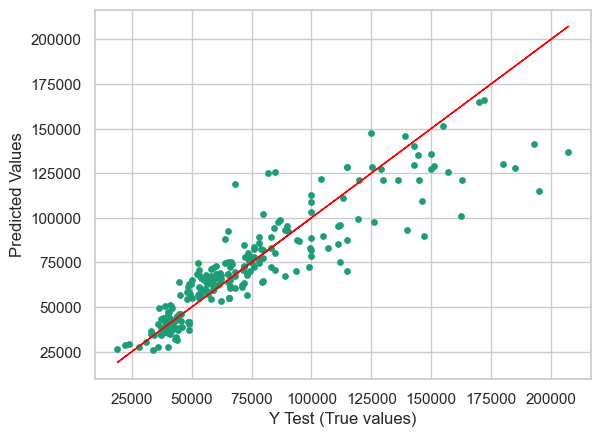

In [56]:
plt.scatter(y_test, predictions, s=15)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted Values')
plt.plot(y_test, y_test, color='red', lw=1)

plt.show()

### 6.2 Evaluating Linear Regression Model
The R-squared (R2) score is commonly used for evaluating the performance of regression models.

In [58]:
print("R^2 on training data: ", lm.score(X_train, y_train))
print("R^2 on testing data: ", lm.score(X_test, y_test))

R^2 on training data:  0.8501021373241855
R^2 on testing data:  0.7943104136980431


R-squared score of 0.79 on testing data means that approximately 79% of the variance in the dependent variable (the variable we are trying to predict) is explained by the independent variables (the predictors). In other words, it means that the model accounts for a large portion of the variability in the data and performs relatively well in explaining the relationship between the independent and dependent variables.

**Residuals**

Residuals are the differences between the observed values and the values predicted by the regression model. It's desirable for these residuals to be normally distributed, as below:

<Axes: xlabel='Price', ylabel='Count'>

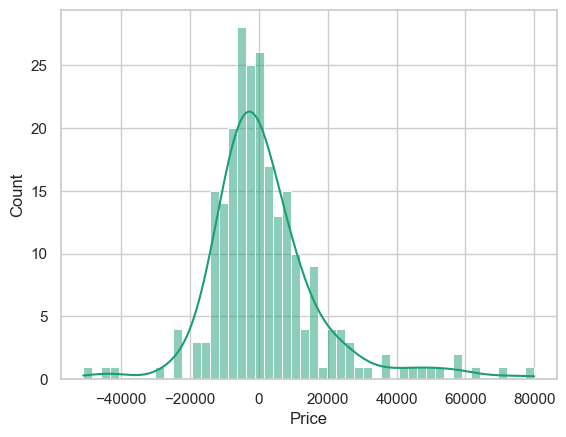

In [59]:
sns.histplot(x=(y_test-predictions), kde=True, bins=50)

## 7. Prediction on test data

In [ ]:
# Example test data
new_test_data = pd.DataFrame({
    'Number of Ratings': [1500],
    'Number of Reviews': [300],
    'brand_ASUS': [1],
    'brand_DELL': [0],
})

# Ensure the new test data has the same columns as the training data
new_test_data = new_test_data.reindex(columns=X_train.columns, fill_value=0)

# Predict the price for the new test data
new_prediction = lm.predict(new_test_data)

print(f"Predicted Price: {new_prediction[0]}")

Predicted Price: 53728.692463165826
